# Phish360 Dataset EDA

> **Note:** This notebook is part of the Anti-Phishing Benchmark Assessment Tool.

<b> Libraries used in this file: </b>

<ul>
<li> pandas
<li> seaborn
<li> matplotlib.pyplot
</ul>
<p>
To Execute this file, you will need to download <b>phish360_phish.parquet</b> and <b>phish360_legit.parquet</b> from <a href = https://drive.google.com/drive/folders/1ulQYtb63pZlhgcKMuTeiDze1onsY1yKT?usp=drive_link><font size="+2">Here!</font></a> 
    <br>(Don't forget to adjust the parquet file paths in the code)   
</p>
    

<a id='home' /> 
<h2> Content: </h2><br>
<a href=#phish><h3>1. Phishing Class Data Exploration</h3></a>
<ul>
    <li><a href=#1>1.1 Reading phish parquet file</a></li>
    <li><a href=#2>1.2 Missing Data</a></li>
    <li><a href=#3>1.3 Average Text Length</a></li>
    <li><a href=#4>1.4 Phish Brand Distribution</a></li>
    <li><a href=#5>1.5 Detected Text Languages</a></li>
    <li><a href=#6>1.6 SSL Distribution</a></li>
    <li><a href=#7>1.7 Top 10 TLD & Domains</a></li>
    <li><a href=#8>1.8 URL Length Stats</a></li>
    <li><a href=#9>1.9 Top 10 FLD & Subdomains</a></li>
</ul>

<a href=#legit><h3>2. Legitimate Class Data Exploration</h3></a>
<ul>
    <li><a href=#11>2.1 Reading Legit parquet file</a></li>
    <li><a href=#22>2.2 Missing Data</a></li>
    <li><a href=#33>2.3 Average Text Length</a></li>
    <li><a href=#44>2.4 Legit Brand Distribution</a></li>
    <li><a href=#55>2.5 Detected Text Languages</a></li>
    <li><a href=#66>2.6 SSL Distribution</a></li>
    <li><a href=#77>2.7 Top 10 TLD & Domains</a></li>
    <li><a href=#88>2.8 URL Length Stats</a></li>
    <li><a href=#99>2.9 Top 10 FLD & Subdomains</a></li>
</ul>

<hr></hr>
<hr></hr>

  <a id='phish' /> 
  <center>
  <h3 id="phish-samples" style="color:red">1. Phish samples</h2>
    </center>

In [27]:
import pandas as pd

<a id='1' /> 
<h2>1.1 Reading Phish parquet file</h2>

In [28]:
%%time
# Replace 'path_to_file' with your local path
phish_samples = pd.read_parquet('path/to/Phish360_phish.parquet')

CPU times: total: 1.27 s
Wall time: 856 ms


In [29]:
phish_samples.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4332 entries, 4917 to 10747
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   dataset_name                 4332 non-null   object
 1   folder_name                  4332 non-null   object
 2   Class                        4332 non-null   object
 3   brand                        4332 non-null   object
 4   URL                          4332 non-null   object
 5   TLD                          4215 non-null   object
 6   Domain                       4215 non-null   object
 7   FLD                          4215 non-null   object
 8   Subdomain                    2098 non-null   object
 9   SSL                          4332 non-null   bool  
 10  image_path                   4332 non-null   object
 11  translated_tf_text           4319 non-null   object
 12  trafilatura_text             4319 non-null   object
 13  trafilatura_text_language    

In [30]:
phish_samples.describe()

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
count,4332,4332,4332,4332,4332,4215,4215,4215,2098,4332,...,4319,4312,4323,4323,4321,4327,4328,4323,4332,4332
unique,1,4332,1,47,4257,289,3189,3199,1242,2,...,3675,30,3995,4002,28,4073,4055,3934,4187,17
top,Phish360,P10001,phish,phish,http://partners.leadfusion.com/leadfusion/well...,com,weebly,weebly.com,www,False,...,Alibaba.com\nEnglish\n??\n??\nEspañol\nPortugu...,English,\n\n\nAlibaba Manufacturer Directory - Supplie...,\n\n\nAlibaba Manufacturer Directory - Supplie...,English,﻿\n\n *[ @]: at \n *[.]: dot \n *[**W-L-D...,\nSign In\n\n\t\n \n\n\t\t\t \n ...,"Alibaba Manufacturer Directory - Suppliers, Ma...",﻿<html><head>\n<title>Sign In</title>\n<meta n...,English
freq,4332,1,4332,1272,5,2242,144,144,588,2484,...,36,2990,14,14,3041,16,9,15,9,4206


In [31]:
# show the first 10 samples in the dataframe
phish_samples.head(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
4917,Phish360,P10001,phish,santander,https://www.ryml-postalsupport.com/banks/retai...,com,ryml-postalsupport,ryml-postalsupport.com,www,True,...,Security Advice\nSantander will never contact ...,English,\n\n\nLogin\n\n\n\n\n\n\n\n\n\n\n\n\nSantander...,\n\n\nLogin\n\n\n\n\n\n\n\n\n\n\n\n\nSantander...,English,﻿ Santander\n\n>>>>\n\n>>>> # Log on to Online...,\n\n\n\n\nLogin\n\n\n\n\n\n\n\n\n\n\n\n\nSanta...,Login\n\nSantander\n\nLog on to Online Banking...,"﻿<html lang=""en-GB""><head><script>var Aes={};A...",English
4918,Phish360,P10002,phish,sparkasse,https://sparkasse-musterstadt.if-einblick.de/p...,de,if-einblick,if-einblick.de,sparkasse-musterstadt,True,...,SEPA\nJednolite przekazy pieni|ne na terenie c...,Polish,Failure transfers\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,\nPrzekazy pieni|ne - Jedno konto do pBatno[ci...,Polish,﻿ [ ![Strona startowa - Sparkasse Musterstadt]...,\nPrzekazy pieni|ne - Jedno konto do pBatno[ci...,Przekazy pieni|ne - Jedno konto do pBatno[ci n...,"﻿<html class=""no-touch js"" lang=""pl""><head>\n<...",English
4919,Phish360,P10003,phish,itau,http://itoken-att.info/\n,info,itoken-att,itoken-att.info,None,False,...,Latam Pass MC Inter\nprodutos e serviços\nConh...,Portuguese,\n\n\n\n\n\n\n\n\n\nCartão de Crédito | Banco ...,\n\n\n\n\n\n\n\n\n\nCartão de Crédito | Banco ...,Portuguese,﻿\n\n>>>>\n\n>>>> ## atenção!\n\n>>>>\n\n>>>> ...,\n \n \n .async-hide {\n ...,Cartão de Crédito | Banco Itaú\n\natenção!\n\n...,"﻿<html class="""" lang=""pt-BR""><head>\n <!-- ...",English
4920,Phish360,P10005,phish,orange,https://fluggersshout.com/app/03dca8f1f9990877...,com,fluggersshout,fluggersshout.com,None,True,...,Bandwidth Limit Exceeded\nThe server is tempor...,English,\n509 Bandwidth Limit Exceeded\n\nBandwidth Li...,\n509 Bandwidth Limit Exceeded\n\nBandwidth Li...,English,﻿\n\n>>>>\n\n>>>> # Bandwidth Limit Exceeded\n...,\n509 Bandwidth Limit Exceeded\n\nBandwidth Li...,509 Bandwidth Limit Exceeded\n\nBandwidth Limi...,﻿<html><head>\n<title>509 Bandwidth Limit Exce...,English
4921,Phish360,P10006,phish,xfinity,http://liquidateam.ga/gi\n,ga,liquidateam,liquidateam.ga,None,False,...,Why Stay Signed In?\nWith this option selected...,English,\n\nSign in to Xfinity\n\n\n\n\n\n\n\n\n\n\n\n...,\n\nSign in to Xfinity\n\n\n\n\n\n\n\n\n\n\n\n...,English,﻿\n\n>>>>\n\n>>>> # Sign in to Xfinity\n\n>>>>...,\n\t\t\t\t\t\n\t\t\t\tSign in to Xfinity\n\t\t...,Sign in to Xfinity\n\nSign in to Xfinity\n\nAd...,"﻿<html class=""light da da-expandable da-expand...",English
4922,Phish360,P10007,phish,impots,http://crm.carsinia.com/custom/fr/impots_final...,com,carsinia,carsinia.com,crm,False,...,Accueil\n>\nAuthentification\n>\nDonnée-person...,French,Individual |taxes.gouv.fr\n\n\n\n\n\n\n\n\n\n\...,\n\n\nParticulier | impots.gouv.fr\n\n\n\n\n\n...,French,﻿ Accueil > Authentification > Donnée-personne...,\n \n\t\n\tParticulier | impots.gouv.fr\n\t...,Particulier | impots.gouv.fr\n\nAccueil > Auth...,"﻿<html lang=""fr""><head>\n <link rel=""shortc...",English
4923,Phish360,P10011,phish,orange,https://orangecom1.yolasite.com/\n,yolasite.com,orangecom1,orangecom1.yolasite.com,orangecom1,True,...,Pour vous identifier\nIndiquez votre compte Or...,French,Orange.com\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\nOrange.com\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,French,﻿ ![](/ws/media-library/c0eb436574c943ba85f500...,\nOrange.com\n\n\n\n\n\n\n\n:root{--ws-color-d...,Orange.com\n\nPour vous identifier\n\nIndiquez...,"﻿<html lang=""fr""><head><meta content="""" name=""...",English
4924,Phish360,P10013,phish,irs,http://irs.gov-validate-details.mitreacris-tra...,ro,mitreacris-trans,mitreacris-trans.ro,irs.gov-validate-details,False,...,Fill the form with your details\nName\nAddress...,English,\nIRS - Ge

In [32]:
# show the last 10 samples in the dataframe
phish_samples.tail(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
10738,Phish360,P02520,phish,phish,https://d50b7b5f-6b9f-4132-b1e2-9ce54d890108.i...,id.repl.co,d50b7b5f-6b9f-4132-b1e2-9ce54d890108,d50b7b5f-6b9f-4132-b1e2-9ce54d890108.id.repl.co,d50b7b5f-6b9f-4132-b1e2-9ce54d890108.id,True,...,La clave personal y todo o cualquier otro meca...,Spanish; Castilian,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nRed L...,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nRed L...,Spanish; Castilian,"﻿ [Cerrar](javascript:; ""Cerrar ayuda"") \n> ...",\n\t\t \n\t \n\t \n\t \n\t \n\t\t\...,Red Link - BANCO DE LA NACION ARGENTINA\n\nCer...,"﻿<html><!-- LOGIN --><head><meta charset=""utf-...",Catalan; Valencian
10739,Phish360,P02521,phish,phish,http://onlinesecure-auth1v.ddns.net/BECU/login...,ddns.net,onlinesecure-auth1v,onlinesecure-auth1v.ddns.net,onlinesecure-auth1v,False,...,Welcome to BECU Online Banking.Please sign in ...,English,\n\n Online Banking Login | BECU\n\n\n\n\n\n\n...,\n\n Online Banking Login | BECU\n\n\n\n\n\n\n...,English,﻿ [ ![BECU Online Banking - More than just\nmo...,\n\n Online Banking Login | BECU\n\n\n\n\n\n\n...,Online Banking Login | BECU\n\nSkip to main co...,"﻿<html class="""" lang=""en""><head><meta charset=...",Welsh
10740,Phish360,P02523,phish,phish,http://invoice.bomberos-melilla.com/\n,com,bomberos-melilla,bomberos-melilla.com,invoice,False,...,Gebruik je een publieke of gedeelde computer?Z...,Dutch; Flemish,Login My Marktplaats\n\n\n\n\n\n\n\n\n\n\n\n\n...,\nLogin Mijn Marktplaats\n\n\n\n\n\n\n\n\n\n\n...,Dutch; Flemish,"﻿ [Marktplaats](https://www.marktplaats.nl/ ""M...",body {transition: opacity ease-in 0.2s; } \nbo...,Login Mijn Marktplaats\n\nMarktplaats\n\nHelp ...,"﻿<html class="" no-touch no-touch"" lang=""nl""><h...",English
10741,Phish360,P02524,phish,phish,https://discountcope.com/foldas/index.htm\n,com,discountcope,discountcope.com,None,True,...,KYC Documentation Update\nDEAR HUIJIE XIAO / M...,English,\n\n\n\n\nLOAN - BANK in UAE | RAKBANK\n\n\n\n...,\n\n\n\n\nLOAN - BANK in UAE | RAKBANK\n\n\n\n...,English,﻿\n\n>>>>\n* Personal __\n\n>>>>\n* Accounts\n...,\n\n\n\n\nLOAN - BANK in UAE | RAKBANK\n\n\n\t...,LOAN - BANK in UAE | RAKBANK\n\nPersonal\n\nAc...,"﻿<html xmlns=""http://www.w3.org/1999/xhtml"" xm...",English
10742,Phish360,P02525,phish,phish,http://demo.bradescocontrol.vertitecnologia.co...,com.br,vertitecnologia,vertitecnologia.com.br,demo.bradescocontrol,False,...,Login\nLembrar minha senha\nNão tem acesso?\nR...,Portuguese,BRADESCO CONTROL\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\n\n\nBradesco Control\n\n\n\n\n\n\n\n\n\n\n...,Portuguese,﻿ ![Bcontrol\nlogo](/assets/bcontrol_logo-f309...,\n \n \n \n Bradesco Control\n\n ...,Bradesco Control\n\nLogin\n\nLembrar minha sen...,"﻿<html><head>\n <meta charset=""utf-8"">\n ...",English
10743,Phish360,P02526,phish,phish,https://6d7cd743-f8b9-4146-9ef2-6517f0b26e51.i...,id.repl.co,6d7cd743-f8b9-4146-9ef2-6517f0b26e51,6d7cd743-f8b9-4146-9ef2-6517f0b26e51.id.repl.co,6d7cd743-f8b9-4146-9ef2-6517f0b26e51.id,True,...,1\n2\n3\nValidación de contacto\nValidación fi...,Spanish; Castilian,Required verification\n\n\n\n\n\n\n\n\n\n\n\n\...,\n\n\n\nVerificacion Requerida\n\n\n\n\n\n\n\n...,Spanish; Castilian,﻿ ![](bFils/imagenes/login/logoBna.png) 1 ![](...,\n\n\n\n\n\nVerificacion Requerida\n\n\n\n\n\n...,Verificacion Requerida\n\n1\n2\n3\n\nValidació...,"﻿<html lang=""en""><head><meta http-equiv=""Conte...",English
10744,Phish360,P02529,phish,phish,https://loginontwtter.yolasite.com/\n,yolasite.com,loginontwtter,loginontwtter.yolasite.com,loginontwtter,True,...,"Home\ncontact\nTwitter\nHome\ncontact\nPhone, ...",English,\n\n\n\n\n\n\nTwitter\n\n\n\n\n\n\n\n\n\n\n\n\...,\n\n\n\n\n\n\nTwitter\n\n\n\n\n\n\n\n\n\n\n\n\...,English,"﻿\n\n>>>>\n* [Home](./ ""Home"")\n\n>>>>\n* [con...",\n 

<hr></hr>

<a id='2' /> 
<h2>1.2 Missing Data</h2>

In [33]:
print('the number of missing HTML files (phish):', sum(phish_samples.full_html.isnull()))
print('the number of missing URLs (phish):', sum(phish_samples.URL.isnull()))
print('the number of missing images (phish):', sum(phish_samples.image_path.isnull()))

the number of missing HTML files (phish): 0
the number of missing URLs (phish): 0
the number of missing images (phish): 0


<hr></hr>

<a id='3' /> 
<h2>1.3 Average Text Length</h2>

In [34]:
print('the average phish HTML code text length:', round(phish_samples.full_html.str.len().sum() / sum(phish_samples.full_html.notnull()), 1))
print('the average phish trafilatura text length:', round((phish_samples.trafilatura_text.str.len().sum() / sum(phish_samples.trafilatura_text.notnull())),1))
print('the average phish BeautifulSoup text length:', round(phish_samples.BeautifulSoup_text.str.len().sum() / sum(phish_samples.BeautifulSoup_text.notnull()), 1))
# print('the average phish html2text text length:', round(phish_samples.html2text_text.str.len().sum() / sum(phish_samples.html2text_text.notnull()), 1))
# print('the average phish html_extract text length:', round(phish_samples.html_extract_text.str.len().sum() / sum(phish_samples.html_extract_text.notnull()), 1))
# print('the average phish lxml_text text length:', round(phish_samples.lxml_text.str.len().sum() / sum(phish_samples.lxml_text.notnull()), 1))



the average phish HTML code text length: 46506.7
the average phish trafilatura text length: 568.8
the average phish BeautifulSoup text length: 1803.6


<hr></hr>

<a id='4' /> 
<h2>1.4 Phish Brand Distribution</h2>


In [35]:
phish_samples.brand.value_counts()

phish         1272
facebook       219
paypal         211
chase          182
office         179
boa            130
orange         129
wellsfargo     125
dhl            115
apple          108
alibaba        107
itau           102
yahoo          101
outlook         93
att             90
google          89
microsoft       82
dropbox         82
adobe           82
amazon          77
santander       57
netflix         53
amex            46
bradesco        40
sparkasse       39
sfr             39
nab             38
usaa            37
xfinity         35
linkedin        34
cibc            34
bmo             33
natwest         26
aol             26
irs             24
ebay            23
match           22
tmobile         22
caixa           21
mic             19
cox             19
bt              16
impots          15
hsbc            14
navy            13
capitalone      10
alllegro         2
Name: brand, dtype: int64

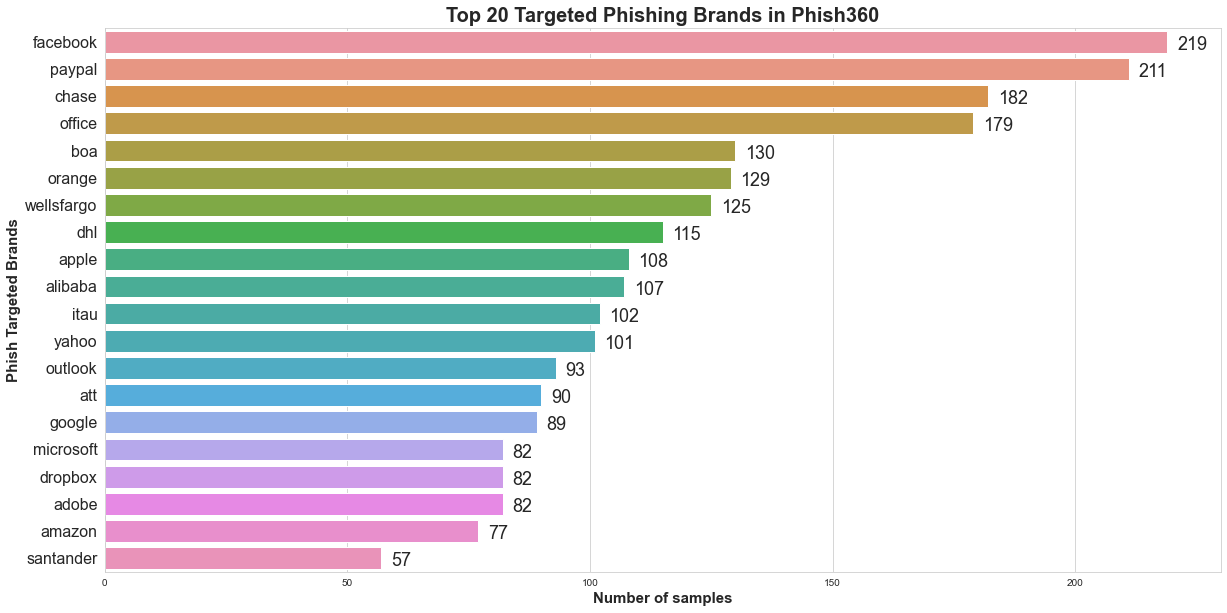

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

brands = phish_samples.brand.value_counts()[1:21].index
values = phish_samples.brand.value_counts()[1:21].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plot = sns.barplot(x=values, y=brands, orient='h')

# Increase the font size of y-axis labels
plot.set_yticklabels(plot.get_yticklabels(), fontsize=16)
# Add labels and title
plt.xlabel('Number of samples', fontsize=15, fontweight='bold')
plt.ylabel('Phish Targeted Brands', fontsize=15, fontweight='bold')
plt.title("Top 20 Targeted Phishing Brands in Phish360", fontsize=20, fontweight='bold')
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+2, p.get_y()+0.7), fontsize=18)
    
# Show the plot
plt.show()

<hr></hr>

<a id='5' /> 
<h2>1.5 Detected Text Languages</h2>

In [37]:
trafilatura_langs_phish = phish_samples.trafilatura_text_language.value_counts()

# top 10 languages detected in trafilatura text
trafilatura_langs_phish[:10]

English               2990
French                 297
Portuguese             244
German                 187
Spanish; Castilian     151
Turkish                132
Italian                 71
Dutch; Flemish          48
Indonesian              44
Catalan; Valencian      18
Name: trafilatura_text_language, dtype: int64

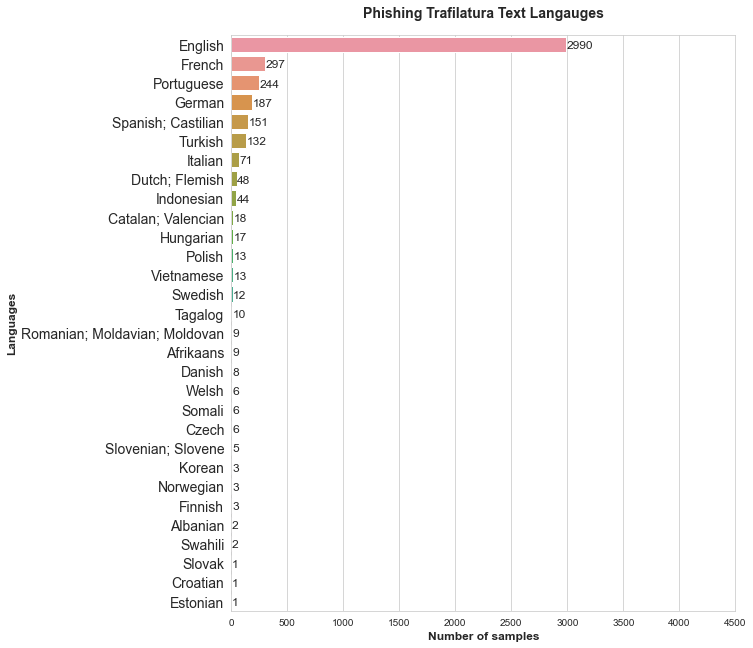

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# langs = trafilatura_langs_phish.index[:30]
# values = trafilatura_langs_phish.values[:30]

langs = trafilatura_langs_phish.index
values = trafilatura_langs_phish.values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))  # Adjust the figure size accordingly

plot = sns.barplot(x=values, y=langs, orient='h')

# Increase the font size of y-axis labels
plot.set_yticklabels(plot.get_yticklabels(), fontsize=14)

# Add labels and title
plt.xlabel('Number of samples', fontsize=12, fontweight='bold')
plt.ylabel('Languages',fontsize=12, fontweight='bold')

# plt.title("Phishing samples detected langauges using Trafilatura Text (30 total langauges)")
plt.title("Phishing Trafilatura Text Langauges", fontsize=14, fontweight='bold', y=1.02)
plt.xlim(0, 4500)
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+5, p.get_y()+0.6), fontsize=12)
# plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+2, p.get_y()+0.7), fontsize=18)
# Adjust the space for labels
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)  # You may need to fine-tune these values

# Show the plot
plt.show()

In [39]:
BeautifulSoup_langs_phish = phish_samples.BeautifulSoup_text_language.value_counts()

# top 10 languages detected in BeautifulSoup text
BeautifulSoup_langs_phish[:10]

English               3041
French                 295
Portuguese             252
German                 181
Spanish; Castilian     143
Turkish                135
Italian                 64
Dutch; Flemish          52
Indonesian              36
Hungarian               14
Name: BeautifulSoup_text_language, dtype: int64

In [40]:
print('The total number of phishing languages (BS): ', len(BeautifulSoup_langs_phish))

The total number of phishing languages (BS):  28


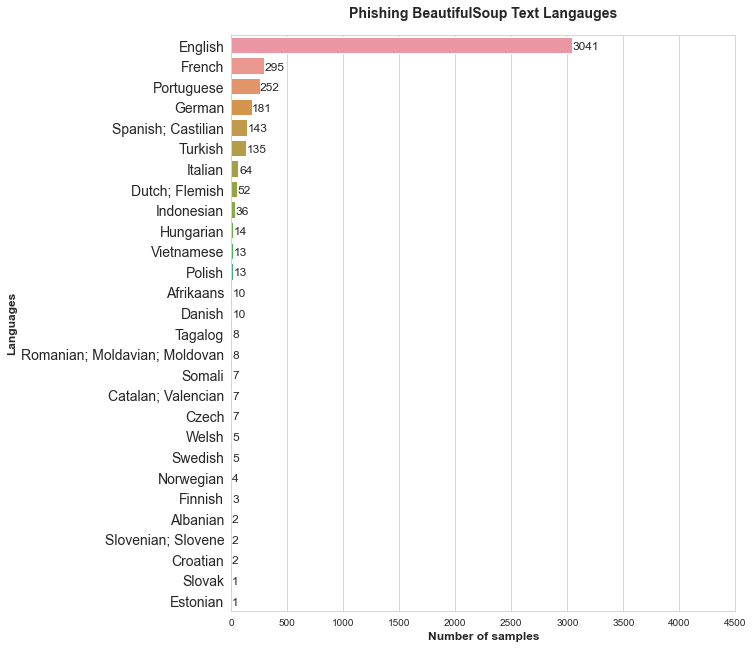

In [41]:
langs = BeautifulSoup_langs_phish.index
values = BeautifulSoup_langs_phish.values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))  # Adjust the figure size accordingly

plot = sns.barplot(x=values, y=langs, orient='h')

# Increase the font size of y-axis labels
plot.set_yticklabels(plot.get_yticklabels(), fontsize=14)

# Add labels and title
plt.xlabel('Number of samples', fontsize=12, fontweight='bold')
plt.ylabel('Languages',fontsize=12, fontweight='bold')

# plt.title("Phishing samples detected langauges using Trafilatura Text (30 total langauges)")
plt.title("Phishing BeautifulSoup Text Langauges", fontsize=14, fontweight='bold', y=1.02)
plt.xlim(0, 4500)
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+5, p.get_y()+0.6), fontsize=12)
# plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+2, p.get_y()+0.7), fontsize=18)
# Adjust the space for labels
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)  # You may need to fine-tune these values

# Show the plot
plt.show()


In [42]:
html_langs_phish = phish_samples.html_text_language.value_counts()

# top 10 languages detected in html text
html_langs_phish[:10]

English               4206
Catalan; Valencian      61
French                  21
Croatian                10
Portuguese               6
German                   5
Somali                   5
Spanish; Castilian       5
Danish                   3
Hungarian                2
Name: html_text_language, dtype: int64

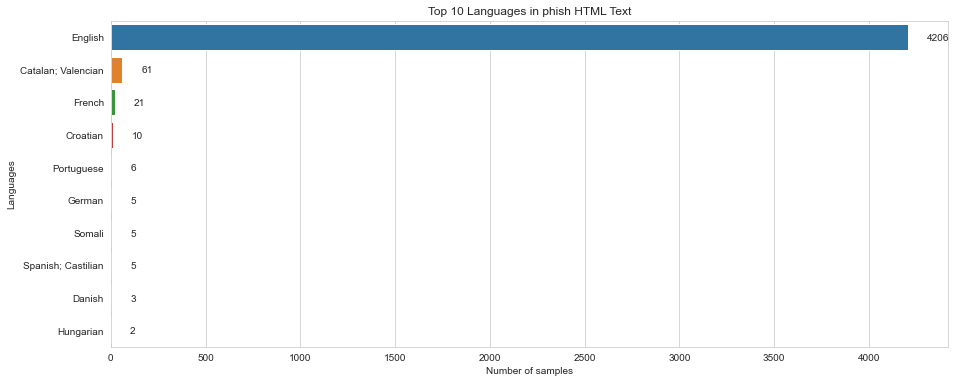

In [43]:
langs = html_langs_phish[:10].index
values = html_langs_phish[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in phish HTML Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


<hr></hr>

<a id='6' /> 
<h2>1.6 SSL Distribution</h2>

In [44]:
phish_samples.SSL.value_counts()

False    2484
True     1848
Name: SSL, dtype: int64

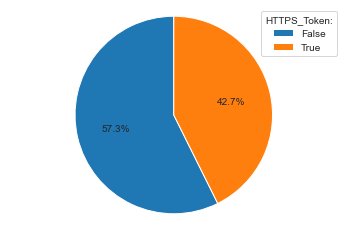

In [45]:
sizes = phish_samples.SSL.value_counts().values 
labels= phish_samples.SSL.value_counts().index 
# fig=plt.figure(figsize=(10, 5))
plt.pie(sizes, startangle = 90, autopct = '%1.1f%%')
plt.legend(labels, title = 'HTTPS_Token:')
plt.axis('equal')

plt.show()

<hr></hr>

<a id='7' /> 
<h2>1.7 Top 10 TLD & Domains</h2>

In [46]:
phish_samples.Domain.value_counts()[:10]

weebly           144
000webhostapp     87
webnode           65
google            48
myfreesites       32
webcindario       21
umbler            21
weblium           18
secureserver      17
if-einblick       16
Name: Domain, dtype: int64

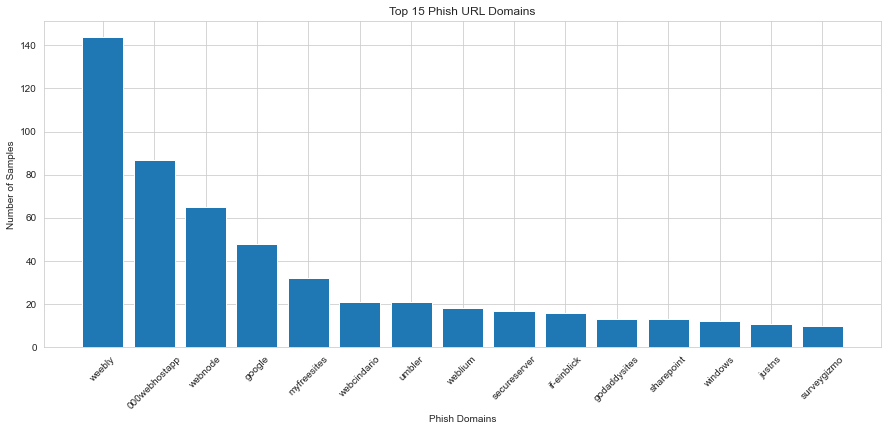

In [47]:
domains = phish_samples.Domain.value_counts()[:15].index
counts = phish_samples.Domain.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(domains, counts)

# Add labels and title
plt.xlabel("Phish Domains")
plt.ylabel("Number of Samples")
plt.title("Top 15 Phish URL Domains")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [48]:
phish_samples.TLD.value_counts()[:10]

com       2242
net        212
com.br     113
org        111
ru          70
com.au      64
de          54
xyz         52
info        49
in          49
Name: TLD, dtype: int64

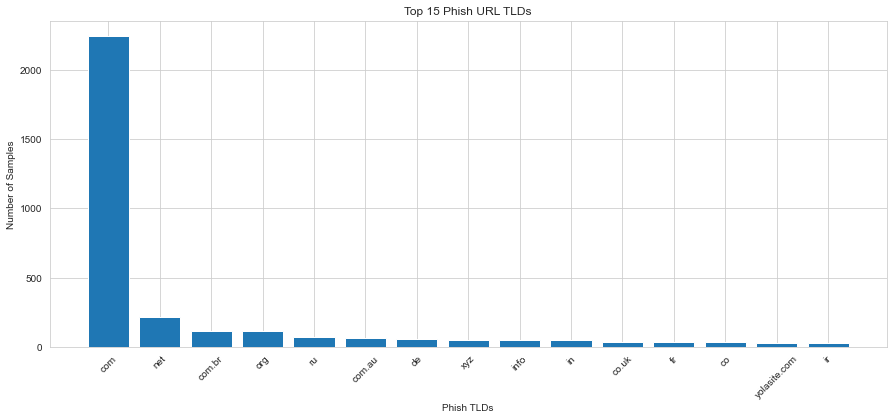

In [49]:
tlds = phish_samples.TLD.value_counts()[:15].index
counts = phish_samples.TLD.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(tlds, counts)

# Add labels and title
plt.xlabel("Phish TLDs")
plt.ylabel("Number of Samples")
plt.title("Top 15 Phish URL TLDs")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

<hr></hr>

<a id='8' /> 
<h2>1.8 URL Length Stats</h2>

In [50]:
print('Phish URL average length:', round(phish_samples.URL.str.len().sum()/sum(phish_samples.URL.notnull()), 4))
print('Phish URL min length:', phish_samples.URL.str.len().min())
print('Phish URL max length:', phish_samples.URL.str.len().max())
print('Phish URL median length:', phish_samples.URL.str.len().median())

Phish URL average length: 76.1025
Phish URL min length: 19
Phish URL max length: 1642
Phish URL median length: 56.0


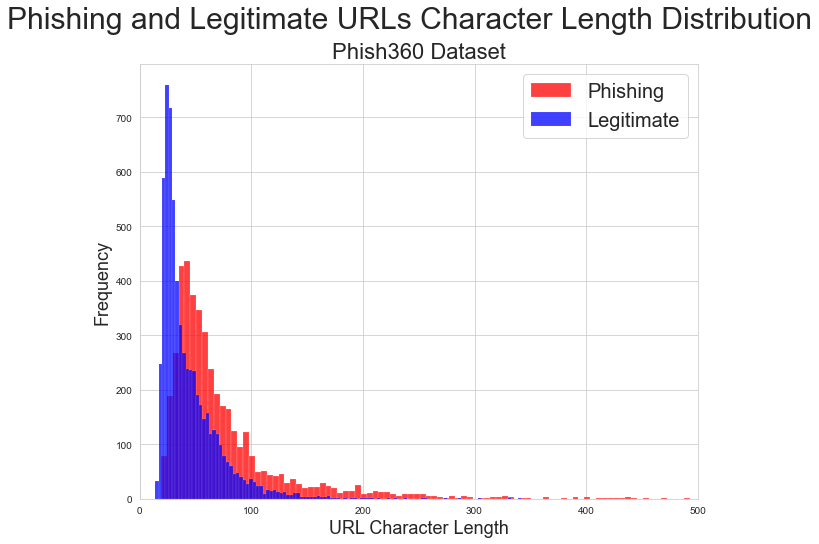

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

phish_samples['url_length'] = phish_samples.URL.str.len()
legit_samples['url_length'] = legit_samples.URL.str.len()

# Create a single subplot for VanNL126k
fig, ax = plt.subplots(figsize=(10, 8))

# Plot phishing dataset
sns.histplot(phish_samples['url_length'], color="red", label="Phishing", ax=ax)

# Plot legitimate dataset on top of phishing
sns.histplot(legit_samples['url_length'], color="blue", label="Legitimate", ax=ax)

title_fontsize = 22

# Set the title and axis labels for the subplot
ax.set_title('Phish360 Dataset', fontsize=title_fontsize)
ax.set_xlabel('URL Character Length', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)

# Set the x-axis limit to 0-800 or adjust as needed
ax.set_xlim(0, 500)

# Add a legend to the subplot
ax.legend(fontsize=20)

# Set the main title
plt.suptitle("Phishing and Legitimate URLs Character Length Distribution", fontsize=30)

plt.show()


<hr></hr>

<a id='9' /> 
<h2>1.9 Top 10 FLD & Subdomains</h2>

In [52]:
phish_samples.iloc[:, 4:9].head(10)

,URL,TLD,Domain,FLD,Subdomain
4917,https://www.ryml-postalsupport.com/banks/retai...,com,ryml-postalsupport,ryml-postalsupport.com,www
4918,https://sparkasse-musterstadt.if-einblick.de/p...,de,if-einblick,if-einblick.de,sparkasse-musterstadt
4919,http://itoken-att.info/\n,info,itoken-att,itoken-att.info,None
4920,https://fluggersshout.com/app/03dca8f1f9990877...,com,fluggersshout,fluggersshout.com,None
4921,http://liquidateam.ga/gi\n,ga,liquidateam,liquidateam.ga,None
4922,http://crm.carsinia.com/custom/fr/impots_final...,com,carsinia,carsinia.com,crm
4923,https://orangecom1.yolasite.com/\n,yolasite.com,orangecom1,orangecom1.yolasite.com,orangecom1
4924,http://irs.gov-validate-details.mitreacris-tra...,ro,mitreacris-trans,mitreacris-trans.ro,irs.gov-validate-details
4925,https://uberbet188.com/wp-includes/ID3/HRBLOCK...,com,uberbet188,uberbet188.com,None
4926,https://agbanimarego.weebly.com/\n,com,weebly,weebly.com,agbanimarego


In [53]:
print('the number of unique flds:', len(phish_samples.URL.unique()) -len(phish_samples.URL))
print('the number of unique flds:', len(legit_samples.URL.unique())- len(legit_samples.URL))

the number of unique flds: -75
the number of unique flds: -38


In [54]:
print('the number of unique flds:', len(phish_samples.FLD.unique()))
phish_samples.FLD.value_counts()[:20]

the number of unique flds: 3200


weebly.com               144
000webhostapp.com         87
webnode.com               63
google.com                48
myfreesites.net           32
umbler.net                21
webcindario.com           21
weblium.site              18
secureserver.net          17
if-einblick.de            16
godaddysites.com          13
sharepoint.com            13
windows.net               12
justns.ru                 11
surveygizmo.com           10
angelfire.com              9
office.com                 9
securewebsession.com       8
googleusercontent.com      6
creatorlink.net            6
Name: FLD, dtype: int64

In [55]:
print('the number of unique subdomains:', len(phish_samples.Subdomain.unique()))
phish_samples.Subdomain.value_counts()[:20]

the number of unique subdomains: 1243


www                                                                         588
sites                                                                        49
mail                                                                         27
sparkasse-musterstadt                                                        16
forms                                                                         9
secure75                                                                      8
shop                                                                          6
partners                                                                      5
piwik                                                                         5
us                                                                            4
a2plvcpnl308307.prod.iad2                                                     4
storage                                                                       4
secure                                  

In [56]:
phish_samples.iloc[:, 4:9].describe()

,URL,TLD,Domain,FLD,Subdomain
count,4332,4215,4215,4215,2098
unique,4257,289,3189,3199,1242
top,http://partners.leadfusion.com/leadfusion/well...,com,weebly,weebly.com,www
freq,5,2242,144,144,588


<hr></hr>

<hr></hr>

<a id='legit' /> 
<center>
  <h2 id="legit-samples" style="color:red">2. Legit samples</h2>
</center>


<a id='11' /> 
<h2>2.1 Reading Legit parquet file</h2>

In [57]:
%%time
# Replace 'path_to_file' with your local path
legit_samples = pd.read_parquet('path/to/Phish360_phish.parquet')

CPU times: total: 3.36 s
Wall time: 2.38 s


In [58]:
legit_samples.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6416 entries, 0 to 9475
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   dataset_name                 6416 non-null   object
 1   folder_name                  6416 non-null   object
 2   Class                        6416 non-null   object
 3   brand                        6416 non-null   object
 4   URL                          6416 non-null   object
 5   TLD                          6408 non-null   object
 6   Domain                       6408 non-null   object
 7   FLD                          6408 non-null   object
 8   Subdomain                    5131 non-null   object
 9   SSL                          6416 non-null   bool  
 10  image_path                   6416 non-null   object
 11  trafilatura_text             6398 non-null   object
 12  trafilatura_text_language    6395 non-null   object
 13  BeautifulSoup_text           6402

In [59]:
legit_samples.head(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
0,Phish360,L01562,legit,unknown,https://www.depicus.com/wake-on-lan/\n,com,depicus,depicus.com,www,True,E:\Datasets\phish360 dataset\trainval\L01562_l...,I never believed that this can be functional -...,English,\n\n\nWelcome to Wake On Lan\n\n\n\n\n\n\n\n\n...,English,﻿ [![Depicus Logo](/img/weblogo.png)](/)\n\n>>...,\n \n \n Welcome to Wake On Lan\n ...,Welcome to Wake On Lan\n\ndepicus\n\nchanging ...,"﻿<html class=""no-js"" itemscope="""" itemtype=""ht...",English
1,Phish360,L01564,legit,unknown,http://liquidsdr.org/doc/tutorial-fec/\n,org,liquidsdr,liquidsdr.org,None,False,E:\Datasets\phish360 dataset\trainval\L01564_l...,Tutorial: Forward Error Correction\nThis tutor...,English,\nTutorial: Forward Error Correction - liquids...,English,﻿ [liquid _sdr_.org](https://liquidsdr.org/) [...,\n Tutorial: Forward Error Correction - liq...,Tutorial: Forward Error Correction - liquidsdr...,"﻿<html lang=""en-US""><head>\n <title>Tutoria...",English
2,Phish360,L01565,legit,unknown,http://www.csgnetwork.com/ctrcalc.html\n,com,csgnetwork,csgnetwork.com,www,False,E:\Datasets\phish360 dataset\trainval\L01565_l...,|\nThis calculator requires the use of Javascr...,English,\nCSG's Click Through Rate Calculator\n\n\n\n\...,English,﻿ ![CSGNetwork.com Free\nInformation](http://s...,\n\nCSG's Click Through Rate Calculator\n\n\n\...,CSG's Click Through Rate Calculator\n\nHome | ...,﻿<html><!-- HTML coding exclusively with the...,English
3,Phish360,L01566,legit,unknown,http://www.dailymusicsheets.com/piano/sheets/\n,com,dailymusicsheets,dailymusicsheets.com,www,False,E:\Datasets\phish360 dataset\trainval\L01566_l...,"Piano Sheet Music""... I'm not conscious of the...",English,\nDaily Music Sheets - Free Downloadable Sheet...,English,﻿ \n>> \n>> # Daily updated free sheet music...,\n Daily Music Sheets - Free Downloadable S...,Daily Music Sheets - Free Downloadable Sheet M...,"﻿<html xmlns=""http://www.w3.org/1999/xhtml"" xm...",English
4,Phish360,L01567,legit,unknown,http://www.mylifetime.com/shows/the-client-list\n,com,mylifetime,mylifetime.com,www,False,E:\Datasets\phish360 dataset\trainval\L01567_l...,"The Client List Full Episodes, Video & More | ...",English,"\nThe Client List Full Episodes, Video & More ...",English,﻿\n\n,"\n The Client List Full Episodes, Video & M...","The Client List Full Episodes, Video & More | ...","﻿<html lang=""en""><head>\n <title>The Client...",English
5,Phish360,L01568,legit,unknown,http://www.gpsinstallations.co.uk/services/aud...,co.uk,gpsinstallations,gpsinstallations.co.uk,www,False,E:\Datasets\phish360 dataset\trainval\L01568_l...,"Here at GPS Installations, we can carry out pu...",English,Public Address System Installation - PA System...,English,\n>>\n* [Home](https://www.gpsinstallations.co...,Public Address System Installation - PA System...,Public Address System Installation - PA System...,"﻿<html class=""no-js"" lang=""""><!--<![endif]--><...",English
6,Phish360,L01569,legit,unknown,http://www.echoecho.com/htmllinks01.htm\n,com,echoecho,echoecho.com,www,False,E:\Datasets\phish360 dataset\trainval\L01569_l...,|\n||\n|\n|\n|\nThe tags used to produce links...,English,\n\n\n\n\n\nLinks : How to Make a Link - HTML ...,English,﻿ \n> | [Link To Us](linktous.htm) | Bookm...,\n \n\n\n\n\n\n\n\nLinks : How to Make a Link ...,Links : How to Make a Link - HTML Tutorial\n\n...,"﻿<html><head>\n<meta http-equiv=""pics-label"" c...",English
7,Phish360,L01570,legit,unknown,https://plato.stanford.edu/entries/voltaire/\n,edu,stanford,stanford.edu,plato,True,E:\Datasets\phish360 dataset\trainval\L01570_l...,"Voltaire\nFrançois-Marie dArouet (16941778), b...",English,\n\n\nVoltaire (Stanford Encyclopedia of Philo...,English,﻿ [![SEP logo](../../symbols/sep-man-red.png)]...,\n\n\nVolt

In [60]:
legit_samples.tail(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
9466,Phish360,L01552,legit,unknown,https://angel.co/provenance\n,co,angel,angel.co,None,True,E:\Datasets\phish360 dataset\test\L01552_legit...,We empower brands to make the sourcing and imp...,English,Provenance | AngelListStartup JobsRecruitInves...,English,﻿[](/)\n\n>>>>\n* [Startup Jobs](/jobs)\n\n>>>...,Provenance | AngelListStartup JobsRecruitInves...,Provenance | AngelList\n\nStartup Jobs\nRecrui...,"﻿<html prefix=""og: http://ogp.me/ns#"" lang=""en...",English
9467,Phish360,L01553,legit,unknown,http://www.gameitnow.com/Traffic-Light-Games-o...,com,gameitnow,gameitnow.com,www,False,E:\Datasets\phish360 dataset\test\L01553_legit...,Rule as a real traffic controller traffic in t...,English,\nTraffic Light Games Free Online - GameItNow....,English,﻿ [![Play your favorite game online right\nnow...,\n Traffic Light Games Free Online - GameItNo...,Traffic Light Games Free Online - GameItNow.co...,"﻿<html xmlns=""http://www.w3.org/1999/xhtml"" xm...",English
9468,Phish360,L01554,legit,unknown,http://www.graphic-design-employment.com/graph...,com,graphic-design-employment,graphic-design-employment.com,www,False,E:\Datasets\phish360 dataset\test\L01554_legit...,I've been working with graphic design software...,English,Graphic Design Software You Need to Learn for ...,English,﻿\n\n>>>>\n\n>>>> ## Cookie Control\n\n>>>>\n\...,Graphic Design Software You Need to Learn for ...,Graphic Design Software You Need to Learn for ...,"﻿<html xmlns:og=""http://opengraphprotocol.org/...",English
9469,Phish360,L01555,legit,unknown,http://www.oregon.gov/oha/amh/pd/Pages/approve...,gov,oregon,oregon.gov,www,False,E:\Datasets\phish360 dataset\test\L01555_legit...,You are here:\nOHA COVID-19 Updates:\nVisit ou...,English,\n\n\n\tOregon Health Authority : Welcome : Pe...,English,﻿ Skip to main content [ ![Oregon.gov\nHomepag...,\n \n \n\tOregon Health Authority : ...,Oregon Health Authority : Welcome : Peer Deliv...,"﻿<html class="" js flexbox flexboxlegacy canvas...",English
9470,Phish360,L01556,legit,unknown,https://www.vimooz.com/film-festivals/sxsw-sou...,com,vimooz,vimooz.com,www,True,E:\Datasets\phish360 dataset\test\L01556_legit...,Filming began in florida on the dramatic horro...,English,"\n\n\n\n\nVIMOOZ | Independent Films, Document...",English,﻿\n\n>>>>\n* [Home](https://www.vimooz.com/)\n...,"\n\n\n\n\nVIMOOZ | Independent Films, Document...","VIMOOZ | Independent Films, Documentary & Film...","﻿<html class="" js "" lang=""en-US""><head>\n<meta...",English
9471,Phish360,L01557,legit,unknown,http://www.advertise.com/\n,com,advertise,advertise.com,www,False,E:\Datasets\phish360 dataset\test\L01557_legit...,ADVERTISER SOLUTIONS THAT DELIVER REAL RESULTS...,English,\n\n Advertise.com | Online Ad Network | Adver...,English,﻿ \n> [ ![](https://www.advertise.com/wp-con...,\n\t\n\t\t\tAdvertise.com | Online Ad Network ...,Advertise.com | Online Ad Network | Advertiser...,"﻿<html class=""Firefox Firefox59 cssanimations ...",English
9472,Phish360,L01558,legit,unknown,http://www.publicbookshelf.com/selfhelp/\n,com,publicbookshelf,publicbookshelf.com,www,False,E:\Datasets\phish360 dataset\test\L01558_legit...,-\nSEX - Avoided Subjects Discussed in Plain E...,English,\n\n\n\nRead Self-help Books Online - Free \n\...,English,﻿ [Home](http://www.publicbookshelf.com) » **S...,\n \n \n \n\tRead Self-help Books Onl...,Read Self-help Books Online - Free\n\nHome » S...,"﻿<html xmlns=""http://www.w3.org/1999/xhtml"" cl...",English
9473,Phish360,L01559,legit,unknown,https://www.directlyrics.com/halsey-hopeless-f...,com,directlyrics,directlyrics.com,www,True,E:\Datasets\phish360 dataset\test\L01559_legit...,Halsey didnt just sing on Episode of Season 44...,English,\n\n\nHalsey lyrics - Directlyrics\n\n\n\n\n\n...,English

In [61]:
legit_samples.describe()

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
count,6416,6416,6416,6416,6416,6408,6408,6408,5131,6416,6416,6398,6395,6402,6402,6407,6411,6402,6416,6416
unique,1,6416,1,1,6378,196,5692,5704,467,2,6416,6269,27,6326,27,6355,6338,6318,6392,19
top,Phish360,L01562,legit,unknown,http://bestreviews.com/best-wireless-routers\n,com,wikipedia,wikipedia.org,www,False,E:\Datasets\phish360 dataset\trainval\L01562_l...,Küçük resimler\nBelge _emas1\nEkler\nÖnceki\nS...,English,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,English,﻿\n\n,\n \n \n \n RestaurantHub NZ\n .f...,RestaurantHub NZ\n\nalso available on\nDiscove...,"﻿<html lang=""eng""><head>\n <meta http-equiv=...",English
freq,6416,1,6416,6416,2,3019,23,23,4487,3873,1,10,4141,3,4151,36,3,3,3,6211


<hr></hr>

<a id='22' /> 
<h2>2.2 Missing Data</h2>

In [62]:
print('the number of missing HTML files (legit):', sum(legit_samples.full_html.isnull()))
print('the number of missing URLs (legit):', sum(legit_samples.URL.isnull()))
print('the number of missing images (legit):', sum(legit_samples.image_path.isnull()))

the number of missing HTML files (legit): 0
the number of missing URLs (legit): 0
the number of missing images (legit): 0


<hr></hr>

<a id='33' /> 
<h2>2.3 Average Text Length</h2>

In [63]:
print('the average legit HTML code text length:', round(legit_samples.full_html.str.len().sum() / sum(legit_samples.full_html.notnull()), 1))
print('the average legit trafilatura text length:', round((legit_samples.trafilatura_text.str.len().sum() / sum(legit_samples.trafilatura_text.notnull())),1))
print('the average legit BeautifulSoup text length:', round(legit_samples.BeautifulSoup_text.str.len().sum() / sum(legit_samples.BeautifulSoup_text.notnull()), 1))
# print('the average legit html2text text length:', round(legit_samples.html2text_text.str.len().sum() / sum(legit_samples.html2text_text.notnull()), 1))
# print('the average legit html_extract text length:', round(legit_samples.html_extract_text.str.len().sum() / sum(legit_samples.html_extract_text.notnull()), 1))
# print('the average legit lxml_text text length:', round(legit_samples.lxml_text.str.len().sum() / sum(legit_samples.lxml_text.notnull()), 1))


the average legit HTML code text length: 115180.4
the average legit trafilatura text length: 4132.5
the average legit BeautifulSoup text length: 9326.6


<hr></hr>

<a id='44' /> 
<h2>2.4 Legit Brand Distribution</h2>

In [64]:
#there are no legitimate brand data
legit_samples.brand.value_counts()

unknown    6416
Name: brand, dtype: int64

<hr></hr>

<a id='55' /> 
<h2>2.5 Detected Text Languages</h2>

In [65]:
trafilatura_langs_legit = legit_samples.trafilatura_text_language.value_counts()

# top 10 languages detected in trafilatura text
trafilatura_langs_legit[:10]

English                          4141
German                            486
Czech                             466
Spanish; Castilian                376
Romanian; Moldavian; Moldovan     193
French                            148
Turkish                           105
Catalan; Valencian                 79
Finnish                            66
Slovak                             55
Name: trafilatura_text_language, dtype: int64

In [66]:
print('The total number of legitimate languages (trafilatura): ', len(trafilatura_langs_legit))

The total number of legitimate languages (trafilatura):  27


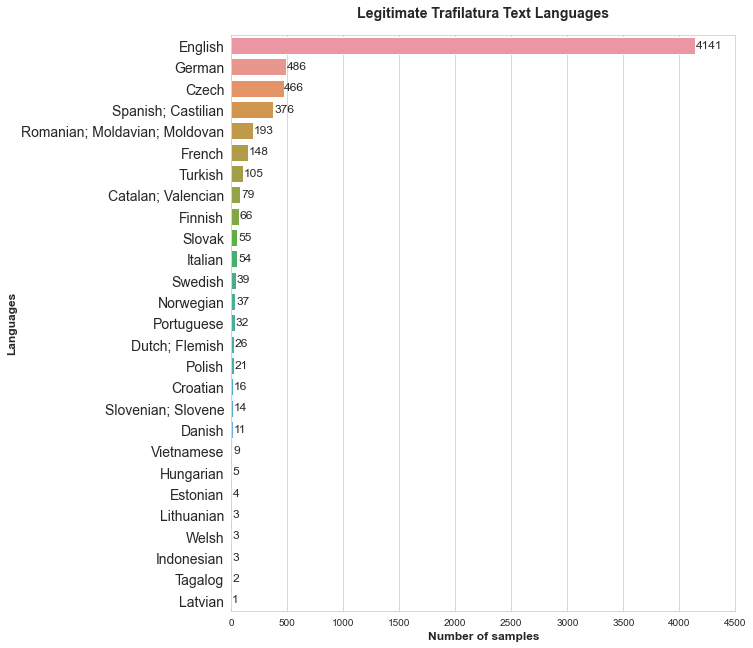

In [67]:
langs = trafilatura_langs_legit.index
values = trafilatura_langs_legit.values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))  # Adjust the figure size accordingly
plot = sns.barplot(x=values, y=langs, orient='h')

# Increase the font size of y-axis labels
plot.set_yticklabels(plot.get_yticklabels(), fontsize=14)


plt.xlabel('Number of samples', fontsize=12, fontweight='bold')
plt.ylabel('Languages',fontsize=12, fontweight='bold')

# plt.title("Top 10 Languages in Legit Trafilatura Text")
plt.title("Legitimate Trafilatura Text Languages", fontsize=14, fontweight='bold', y=1.02)
plt.xlim(0, 4500)
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+7, p.get_y()+0.5), fontsize=12)
# Show the plot
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)  # You may need to fine-tune these values
plt.show()

In [68]:
BeautifulSoup_langs_legit = legit_samples.BeautifulSoup_text_language.value_counts()

# top 10 languages detected in BeautifulSoup text
BeautifulSoup_langs_legit[:10]

English                          4151
German                            479
Czech                             463
Spanish; Castilian                385
Romanian; Moldavian; Moldovan     199
French                            147
Turkish                           106
Catalan; Valencian                 77
Finnish                            66
Slovak                             56
Name: BeautifulSoup_text_language, dtype: int64

In [69]:
print('The total number of legitimate languages (BS): ', len(BeautifulSoup_langs_legit))

The total number of legitimate languages (BS):  27


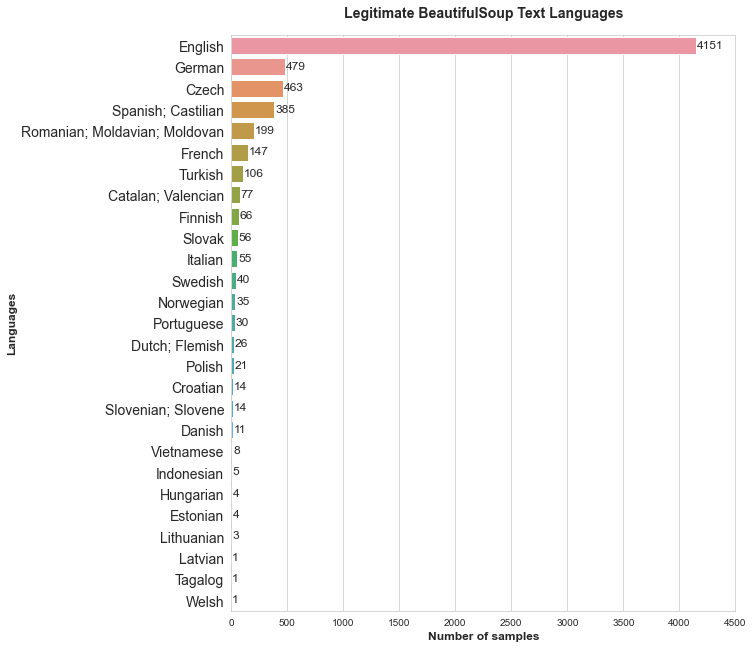

In [70]:
langs = BeautifulSoup_langs_legit.index
values = BeautifulSoup_langs_legit.values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))  # Adjust the figure size accordingly
plot = sns.barplot(x=values, y=langs, orient='h')

# Increase the font size of y-axis labels
plot.set_yticklabels(plot.get_yticklabels(), fontsize=14)


plt.xlabel('Number of samples', fontsize=12, fontweight='bold')
plt.ylabel('Languages',fontsize=12, fontweight='bold')

# plt.title("Top 10 Languages in Legit Trafilatura Text")
plt.title("Legitimate BeautifulSoup Text Languages", fontsize=14, fontweight='bold', y=1.02)
plt.xlim(0, 4500)
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+7, p.get_y()+0.5), fontsize=12)
# Show the plot
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)  # You may need to fine-tune these values
plt.show()

In [71]:
html_langs_legit = legit_samples.html_text_language.value_counts()

# top 10 languages detected in html text
html_langs_legit[:10]

English                          6211
Czech                              50
Catalan; Valencian                 36
French                             34
Spanish; Castilian                 21
Romanian; Moldavian; Moldovan      19
German                             13
Slovak                              6
Italian                             5
Danish                              5
Name: html_text_language, dtype: int64

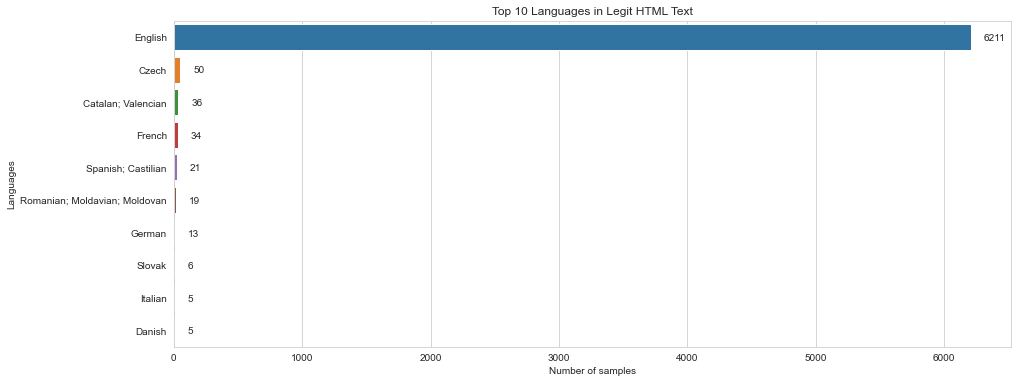

In [72]:
langs = html_langs_legit[:10].index
values = html_langs_legit[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in Legit HTML Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


<hr></hr>

<a id='66' /> 
<h2>2.6 SSL Distribution</h2>

In [73]:
legit_samples.SSL.value_counts()

False    3873
True     2543
Name: SSL, dtype: int64

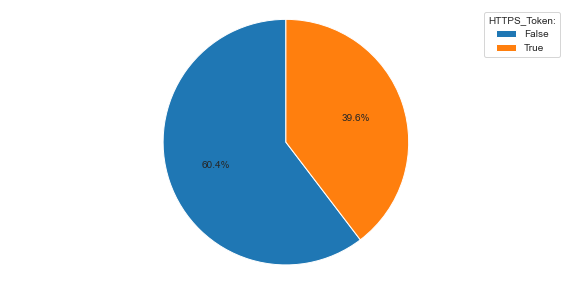

In [74]:
sizes = legit_samples.SSL.value_counts().values 
labels= legit_samples.SSL.value_counts().index 
fig=plt.figure(figsize=(10, 5))
plt.pie(sizes, startangle = 90, autopct = '%1.1f%%')
plt.legend(labels, title = 'HTTPS_Token:')
plt.axis('equal')

plt.show()

<hr></hr>

<a id='77' /> 
<h2>2.7 Top 10 TLD & Domains</h2>

In [75]:
legit_samples.Domain.value_counts()[:10]

wikipedia             23
makeuseof             10
ehow                  10
computerhope          10
streamingmedia         6
businessdictionary     6
howtogeek              6
pinterest              5
explainthatstuff       5
livestrong             5
Name: Domain, dtype: int64

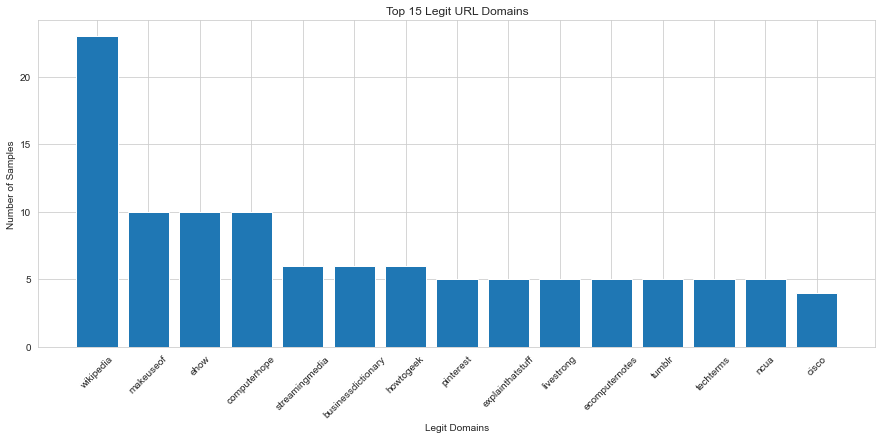

In [76]:
domains = legit_samples.Domain.value_counts()[:15].index
counts = legit_samples.Domain.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(domains, counts)

# Add labels and title
plt.xlabel("Legit Domains")
plt.ylabel("Number of Samples")
plt.title("Top 15 Legit URL Domains")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [77]:
legit_samples.TLD.value_counts()[:10]

com      3019
org       610
cz        446
de        371
ro        188
es        144
net       144
edu        82
fi         81
co.uk      77
Name: TLD, dtype: int64

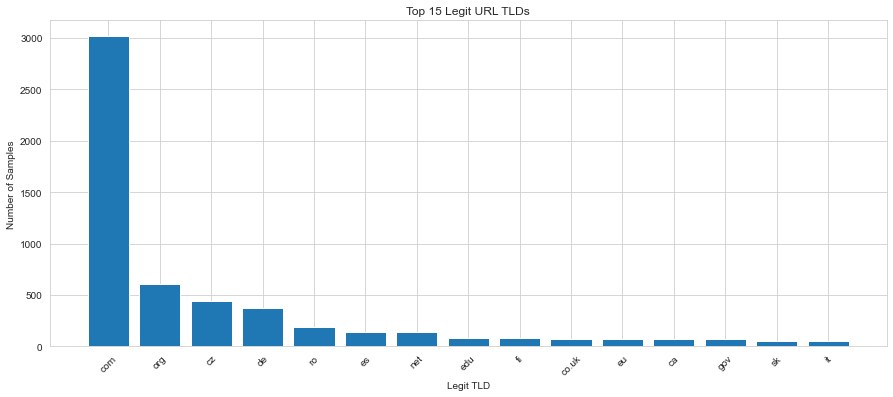

In [78]:
tlds = legit_samples.TLD.value_counts()[:15].index
counts = legit_samples.TLD.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(tlds, counts)

# Add labels and title
plt.xlabel("Legit TLD")
plt.ylabel("Number of Samples")
plt.title("Top 15 Legit URL TLDs")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

<hr></hr>

<a id='88' /> 
<h2>2.8 URL Length Stats</h2>

In [79]:
print('Legit URL average length:', round(legit_samples.URL.str.len().sum()/sum(legit_samples.URL.notnull()), 4))
print('Legit URL min length:', legit_samples.URL.str.len().min())
print('Legit URL max length:', legit_samples.URL.str.len().max())
print('Legit URL median length:', legit_samples.URL.str.len().median())

Legit URL average length: 44.3003
Legit URL min length: 14
Legit URL max length: 342
Legit URL median length: 35.0


<hr></hr>

<a id='99' /> 
<h2>2.9 Top 10 FLD & Subdomains</h2>

In [80]:
legit_samples.iloc[:, 4:9].head(10)

,URL,TLD,Domain,FLD,Subdomain
0,https://www.depicus.com/wake-on-lan/\n,com,depicus,depicus.com,www
1,http://liquidsdr.org/doc/tutorial-fec/\n,org,liquidsdr,liquidsdr.org,None
2,http://www.csgnetwork.com/ctrcalc.html\n,com,csgnetwork,csgnetwork.com,www
3,http://www.dailymusicsheets.com/piano/sheets/\n,com,dailymusicsheets,dailymusicsheets.com,www
4,http://www.mylifetime.com/shows/the-client-list\n,com,mylifetime,mylifetime.com,www
5,http://www.gpsinstallations.co.uk/services/aud...,co.uk,gpsinstallations,gpsinstallations.co.uk,www
6,http://www.echoecho.com/htmllinks01.htm\n,com,echoecho,echoecho.com,www
7,https://plato.stanford.edu/entries/voltaire/\n,edu,stanford,stanford.edu,plato
8,http://www.123helpme.com/tps-a-transaction-pro...,com,123helpme,123helpme.com,www
9,https://www.brandsoftheworld.com/logo/save-the...,com,brandsoftheworld,brandsoftheworld.com,www


In [81]:
print('the number of unique fld:', len(legit_samples.FLD.unique()))
legit_samples.FLD.value_counts()[:20]

the number of unique fld: 5705


wikipedia.org                    23
makeuseof.com                    10
computerhope.com                 10
ehow.com                          8
howtogeek.com                     6
businessdictionary.com            6
streamingmedia.com                6
pinterest.com                     5
livestrong.com                    5
ncua.gov                          5
techterms.com                     5
explainthatstuff.com              5
ecomputernotes.com                5
tumblr.com                        5
ussoccerda.com                    4
sapo.mz                           4
ghdp.com                          4
msubulldogclub.com                4
graphic-design-employment.com     4
ravensburger-gruppe.de            4
Name: FLD, dtype: int64

In [82]:
print('the number of unique subdomains:', len(legit_samples.Subdomain.unique()))
legit_samples.Subdomain.value_counts()[:20]

the number of unique subdomains: 468


www         4487
en            32
ru            11
shop          10
www.cs        10
blog           8
wiki           7
app            7
web            5
docs           5
taxi           4
news           4
extranet       4
source         4
m              4
forum          4
corp           4
online         4
en.m           4
pro            3
Name: Subdomain, dtype: int64

In [83]:
legit_samples.iloc[:, 4:9].describe()

,URL,TLD,Domain,FLD,Subdomain
count,6416,6408,6408,6408,5131
unique,6378,196,5692,5704,467
top,http://bestreviews.com/best-wireless-routers\n,com,wikipedia,wikipedia.org,www
freq,2,3019,23,23,4487


## Key Findings & Quality Assessment

### Uniqueness Analysis
- **URL Uniqueness:** High/Low (Refer to 1.8)
- **Content Uniqueness:** High/Low (Refer to describes)

> **Observation:** Compare the `unique` counts in the `df.describe()` outputs above. A significant drop from URL unique count to Content (HTML/Text) unique count indicates data redundancy.

### Multimodal Integrity
- Check for non-null values in `trafilatura_text`, `BeautifulSoup_text`, and `image_path` columns in Section 1.1 and 2.1.
